In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.models import Model

2024-05-10 12:39:52.192354: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Define the directory where you uploaded the images
toilets_dir = os.path.join(current_dir, 'toilets')

# Get a list of filenames
toilet_images = [os.path.join(toilets_dir, fname) for fname in os.listdir(toilets_dir)]


In [3]:
# Base directory
base_dir = 'toilets'

# Subdirectories
toilets_dir = os.path.join(base_dir, 'toilets')
faucets_dir = os.path.join(base_dir, 'faucets')

# Get a list of filenames
toilet_images = [os.path.join(toilets_dir, fname) for fname in os.listdir(toilets_dir)]
faucet_images = [os.path.join(faucets_dir, fname) for fname in os.listdir(faucets_dir)]

# Labels: 0 for toilet, 1 for faucet
toilet_labels = [0] * len(toilet_images)
faucet_labels = [1] * len(faucet_images)

# Combine into a single dataset
images = toilet_images + faucet_images
labels = toilet_labels + faucet_labels

# Convert to numpy array
images = np.array(images)
labels = np.array(labels)

# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [4]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_images_and_labels(image_paths, image_size=(360, 320)):
    images = []
    for image_path in image_paths:
        image = load_img(image_path, target_size=image_size)
        image = img_to_array(image)
        images.append(image)
    return np.array(images)

# Load images based on previously split lists
train_images = load_images_and_labels(train_images)
val_images = load_images_and_labels(val_images)
test_images = load_images_and_labels(test_images)

# Normalize the images
train_images /= 255.0
val_images /= 255.0
test_images /= 255.0  #scale pixel values to the range [0, 1]


In [5]:
def display_images(image_paths, title, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        img = load_img(image_paths[i], target_size=(360, 320))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

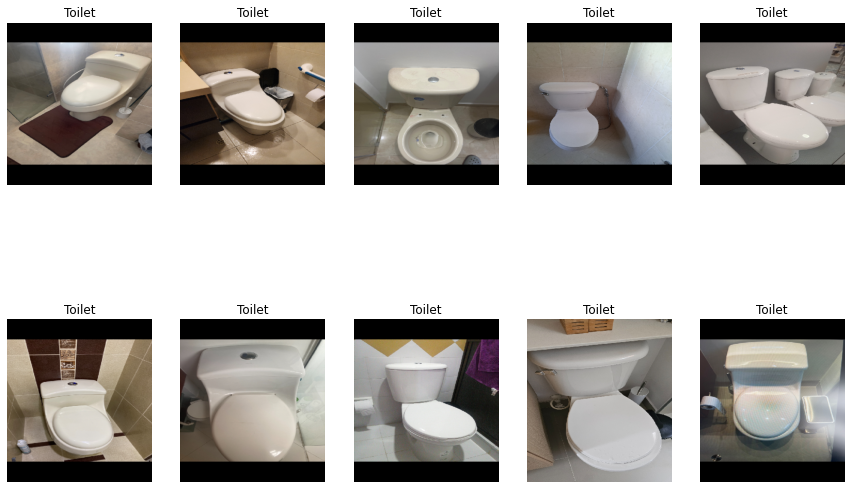

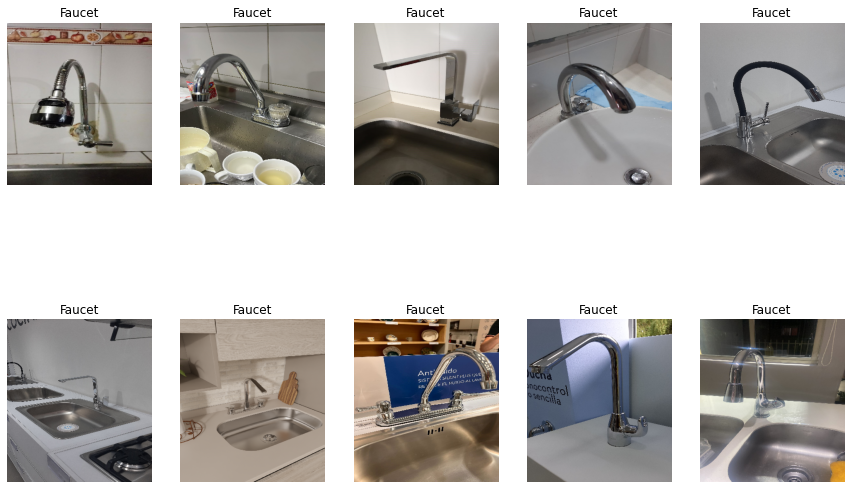

In [6]:
base_dir = 'toilets'
toilets_dir = os.path.join(base_dir, 'toilets')
faucets_dir = os.path.join(base_dir, 'faucets')

# List image paths
toilet_images = [os.path.join(toilets_dir, fname) for fname in os.listdir(toilets_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))][:10]
faucet_images = [os.path.join(faucets_dir, fname) for fname in os.listdir(faucets_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))][:10]

# Display images
display_images(toilet_images, 'Toilet')
display_images(faucet_images, 'Faucet')

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(360, 320, 3), kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(lr=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
    train_images, train_labels,
    batch_size=20,
    epochs=14,
    validation_data=(val_images, val_labels)
)

Epoch 1/14
49/49 [==============================] - 169s 3s/step - loss: 0.8097 - accuracy: 0.8428 - val_loss: 0.2558 - val_accuracy: 0.9195
Epoch 2/14
49/49 [==============================] - 211s 4s/step - loss: 0.2083 - accuracy: 0.9597 - val_loss: 0.1776 - val_accuracy: 0.9783
Epoch 3/14
49/49 [==============================] - 149s 3s/step - loss: 0.1972 - accuracy: 0.9648 - val_loss: 0.1991 - val_accuracy: 0.9536
Epoch 4/14
49/49 [==============================] - 161s 3s/step - loss: 0.3038 - accuracy: 0.9566 - val_loss: 0.5166 - val_accuracy: 0.8854
Epoch 5/14
49/49 [==============================] - 143s 3s/step - loss: 0.3173 - accuracy: 0.9080 - val_loss: 0.2206 - val_accuracy: 0.9505
Epoch 6/14
49/49 [==============================] - 148s 3s/step - loss: 0.2018 - accuracy: 0.9545 - val_loss: 0.3615 - val_accuracy: 0.9164
Epoch 7/14
49/49 [==============================] - 148s 3s/step - loss: 0.1381 - accuracy: 0.9824 - val_loss: 0.1644 - val_accuracy: 0.9721
Epoch 8/14
49

In [9]:
results = model.evaluate(test_images, test_labels)
print("test loss, test acc:", results)

11/11 [==============================] - 11s 835ms/step - loss: 0.2038 - accuracy: 0.9690
test loss, test acc: [0.20381036400794983, 0.9690402746200562]


In [10]:
# Generate predictions
predictions = model.predict(test_images)
predicted_classes = (predictions > 0.5).astype(int)

11/11 [==============================] - 10s 877ms/step


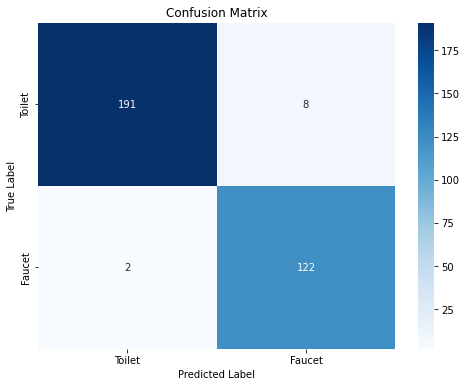

In [11]:
cm = confusion_matrix(test_labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Toilet', 'Faucet'], yticklabels=['Toilet', 'Faucet'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

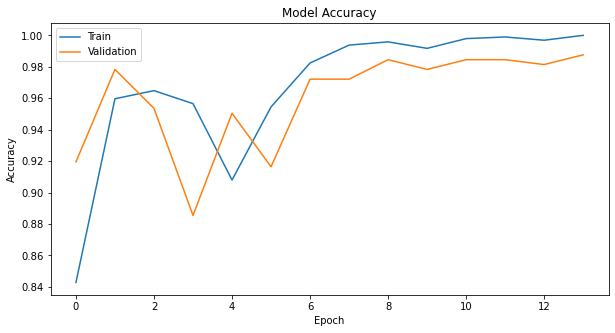

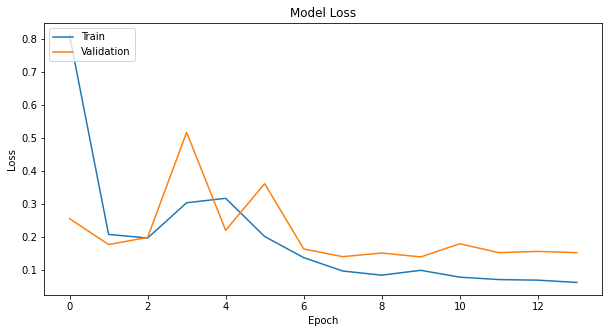

In [12]:
# Accuracy Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


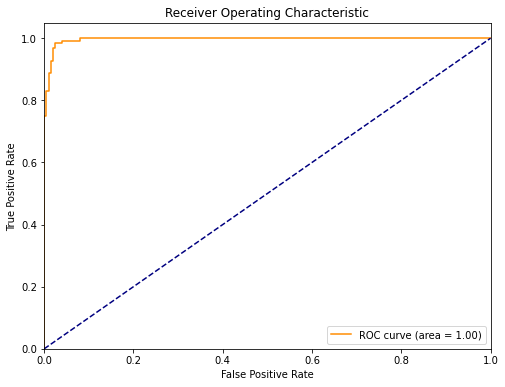

In [13]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(test_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


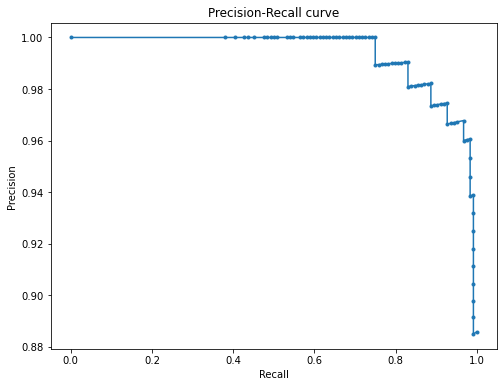

In [14]:
precision, recall, _ = precision_recall_curve(test_labels, predictions)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


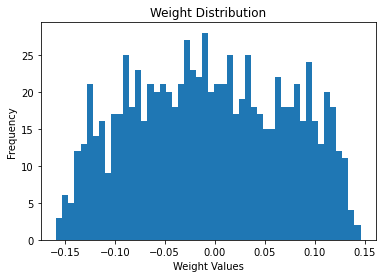

In [15]:
weights, biases = model.layers[0].get_weights()
plt.hist(weights.flatten(), bins=50)
plt.title('Weight Distribution')
plt.xlabel('Weight Values')
plt.ylabel('Frequency')
plt.show()


In [16]:
model.save('capstone821.h5')

/opt/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from keras.models import load_model

model2 = load_model('/Users/mdredowanaminmollick/Downloads/capstone821.h5')

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 318, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 179, 159, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 157, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 88, 78, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 76, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 43, 38, 128)       0

In [18]:
# Load the trained model
import tensorflow as tf
model = tf.keras.models.load_model('/Users/mdredowanaminmollick/Downloads/capstone821.h5')

In [26]:
# Load and resize the image to match the input size of the model
def load_and_preprocess_image(image_path, target_size=(360, 320)):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to an array
    img = img_to_array(img)
    # Rescale the image (as per the training data preprocessing)
    img /= 255.0
    # Expand dimensions to match the model's input format
    img = np.expand_dims(img, axis=0)  # Model expects (batch_size, height, width, channels)
    return img

# Example usage
image_path = '/Users/mdredowanaminmollick/Downloads/demo2.webp'
new_image = load_and_preprocess_image(image_path)

In [27]:
# Predict the class
predictions = model.predict(new_image)
predicted_class = (predictions > 0.5).astype(int)

# Assuming binary classification with 0 and 1 as classes
class_labels = {0: 'Toilet', 1: 'Faucet'}
predicted_class_label = class_labels[predicted_class[0][0]]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 1s 1s/step
Predicted class: Toilet
